In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
df = pd.read_csv('data/raw.csv')

In [3]:
df.head()

,Gender,Race_Ethnicity,Parental_Level_O,Test_prep,lunch,Math_score,Reading_Score,Writing_Score
0,Female,Group B,Bachelor's Degre Standard,NaN,Standard,72,72,74
1,Male,Group C,some college,Complete,Standard,69,90,88
2,Female,Group A,master's degree,NaN,Standard,90,95,93
3,Male,Group B,associate's degree,NaN,free/reduced,47,97,44
4,Female,Group C,high school,NaN,Standard,76,78,75


In [5]:
X = df.drop(columns=['Math_score'],axis=1)

In [6]:
X.head()

,Gender,Race_Ethnicity,Parental_Level_O,Test_prep,lunch,Reading_Score,Writing_Score
0,Female,Group B,Bachelor's Degre Standard,NaN,Standard,72,74
1,Male,Group C,some college,Complete,Standard,90,88
2,Female,Group A,master's degree,NaN,Standard,95,93
3,Male,Group B,associate's degree,NaN,free/reduced,97,44
4,Female,Group C,high school,NaN,Standard,78,75


In [9]:
print("Categories in 'Gender' variable:     ",end=" " )
print(df['Gender'].unique())

print("Categories in 'Race_Ethnicity' variable:  ",end=" ")
print(df['Race_Ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['Parental_Level_O'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['Test_prep'].unique())

Categories in 'Gender' variable:      ['Female' 'Male']
Categories in 'Race_Ethnicity' variable:   ['Group B' 'Group C' 'Group A' 'Group D']
Categories in'parental level of education' variable: ["Bachelor's Degre Standard" 'some college' "master's degree"
 "associate's degree" 'high school']
Categories in 'lunch' variable:      ['Standard' 'free/reduced']
Categories in 'test preparation course' variable:      [nan 'Complete']


In [11]:
y = df['Math_score']

In [12]:
y

0     72
1     69
2     90
3     47
4     76
5     71
6     88
7     40
8     64
9     38
10    58
11    40
12    65
13    98
14    99
15    51
16    56
17    34
18    65
19    78
20    67
21    43
22    56
23    56
24    65
25    43
26    34
27    32
28    75
29    85
30    93
31    65
32    99
33    76
34    89
Name: Math_score, dtype: int64

In [13]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [14]:
X = preprocessor.fit_transform(X)

In [15]:
X.shape

(35, 17)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((28, 17), (7, 17))

In [17]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [18]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 16.0970
- Mean Absolute Error: 12.8920
- R2 Score: 0.3026
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 23.5993
- Mean Absolute Error: 19.5703
- R2 Score: -0.1818


Lasso
Model performance for Training set
- Root Mean Squared Error: 17.1981
- Mean Absolute Error: 13.5234
- R2 Score: 0.2039
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 23.3739
- Mean Absolute Error: 20.1538
- R2 Score: -0.1593


Ridge
Model performance for Training set
- Root Mean Squared Error: 16.2208
- Mean Absolute Error: 12.7769
- R2 Score: 0.2918
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 23.1247
- Mean Absolute Error: 19.5401
- R2 Score: -0.1347


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 17.7358
- Mean Absolute Error: 14.8857
- R2 Score: 0.1533
------

In [19]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
3,K-Neighbors Regressor,0.146407
2,Ridge,-0.134716
7,CatBoosting Regressor,-0.148347
1,Lasso,-0.159303
0,Linear Regression,-0.181765
5,Random Forest Regressor,-0.312415
8,AdaBoost Regressor,-0.449001
6,XGBRegressor,-0.640565
4,Decision Tree,-0.820024


In [20]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is -18.18


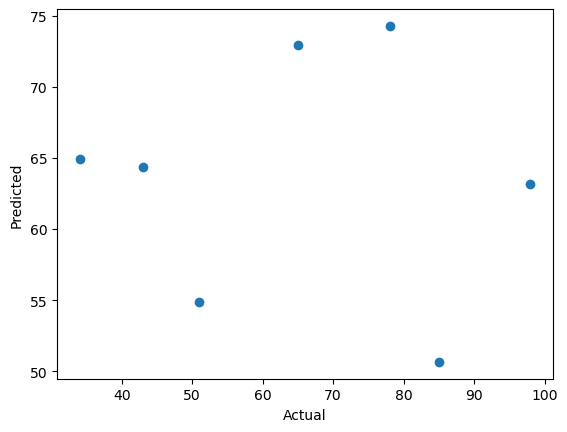

In [21]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

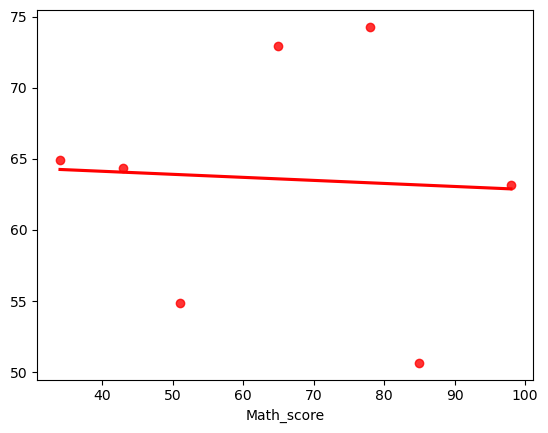

In [22]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [23]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
26,34,64.911564,-30.911564
13,98,63.145106,34.854894
24,65,72.924147,-7.924147
21,43,64.374925,-21.374925
15,51,54.876597,-3.876597
29,85,50.653771,34.346229
19,78,74.296509,3.703491
